# Testing HOTS algorithm on N-MNIST dataset

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../'

/Users/joe/Documents/boulot/git/homhots/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time 

from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet, LoadNMNIST
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansLagorce import KmeansLagorce
from HOTS.KmeansMaro import KmeansMaro
from HOTS.conv2eve import conv2eve

tau = 0.02
R = 2
nb_cluster = [4, 8, 16]
ImageSize = (34, 34)
DataPath = '../../../python/testsetnmnist.p'

## Loading random digits from the N-MNIST dataset (2 polarities used)

In [8]:
NbClusteringData = 5
NbTrainingData = 5
NbTestingData = 5
event_tr, event_te, event_cl, label_tr, label_te = LoadNMNIST(
NbTrainingData, NbTestingData, NbClusteringData, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)

## Testing HOTS on N-MNIST

In [4]:
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="exponential"
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential"
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential"
)
Net = Network([L1, L2, L3])

timestr = time.strftime("%Y%m%d")

fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots.pkl'
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:60.0% ### normalized:60.0% ### euclidian:60.0% ### 


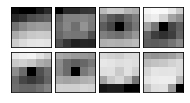

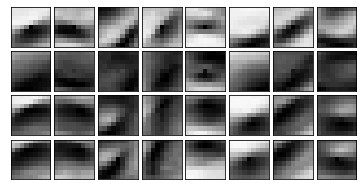

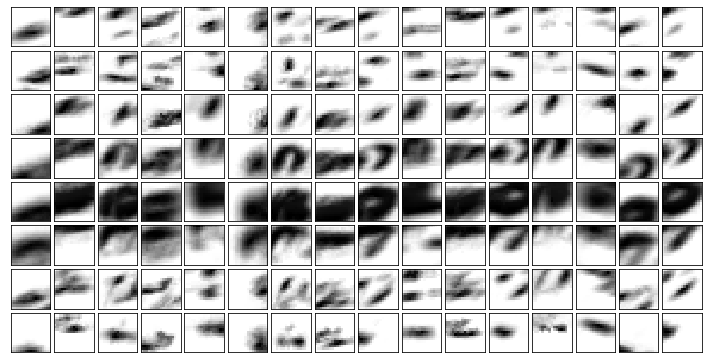

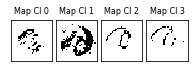

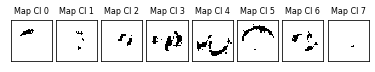

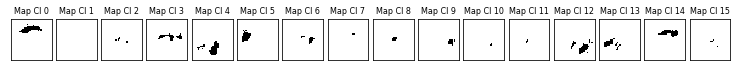

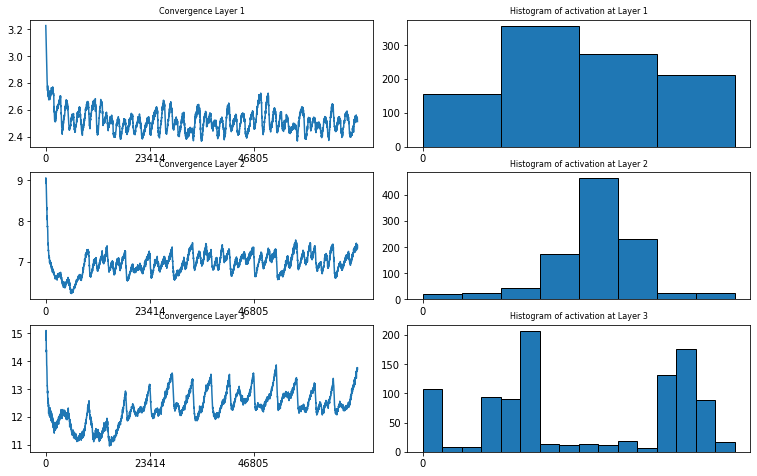

In [6]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

event_to_show, eventnul, eventnull, labelnul, labelnull = LoadNMNIST(
1, 0, 0, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

In [ ]:
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="exponential", homeo = True
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential", homeo = True
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential", homeo = True
)
Net = Network([L1, L2, L3])

timestr = time.strftime("%Y%m%d")

fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_homeo.pkl'
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    

In [15]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

event_to_show, eventnul, eventnull, labelnul, labelnull = LoadNMNIST(
1, 0, 0, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

G


[('X', 14812), ('F', 11472), ('Y', 10978), ('G', 15578), ('Z', 14688), ('H', 16841), ('0', 14493), ('I', 6346), ('1', 9017), ('J', 8130), ('2', 12730), ('K', 15852), ('3', 12331), ('L', 10718), ('4', 14178), ('M', 28692), ('5', 12688), ('N', 18558), ('6', 14169), ('O', 15664), ('7', 9441), ('P', 13586), ('8', 14715), ('Q', 15812), ('9', 15067), ('R', 16944), ('S', 12674), ('A', 15604), ('T', 9524), ('B', 18270), ('U', 15065), ('C', 12510), ('V', 14331), ('D', 17193), ('W', 27015), ('E', 15122), ('X', 14646), ('F', 11356), ('Y', 10149), ('G', 15511), ('Z', 14019), ('H', 17054), ('0', 14819), ('I', 8167), ('1', 8644), ('J', 8143), ('2', 11447), ('K', 15819), ('3', 11978), ('L', 8303), ('4', 12605), ('M', 28315), ('5', 11910), ('N', 18447), ('6', 13574), ('O', 15313), ('7', 8628), ('P', 13562), ('8', 13507), ('Q', 15990), ('9', 13864), ('R', 16820), ('S', 12001), ('A', 15440), ('T', 9098), ('B', 17803), ('U', 14373), ('C', 12621), ('V', 13523), ('D', 17290), ('W', 27736), ('E', 15213), ('